## DSCI-552 Homework 07

### Cassandra Man, USC ID #4731096972

In [1]:
# Import python libraries
import pandas as pd
import numpy as np
import seaborn as sn
from pandas import DataFrame
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import statistics
import warnings
import xgboost as xg
from imblearn.pipeline import make_pipeline, Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import hamming_loss
from sklearn.svm import SVC
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from scipy.spatial.distance import hamming
from sklearn.metrics import hamming_loss

## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

### A. Download the Anuran Calls (MFCCs) Data Set

In [2]:
# Load .csv files
df = pd.read_csv("../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv")

In [3]:
# Get dependent and independent variables
x = df.iloc[:, :22]
y = df.iloc[:, 22:25]

In [4]:
# Choose 70% of data randomly as training set
x_train, x_test, y_train_all, y_test_all = train_test_split(x, y, test_size=0.30, random_state=42)

In [5]:
# Preview train data
x_train.shape

(5036, 22)

In [6]:
# Preview train data
y_train_all.shape

(5036, 3)

In [7]:
# Preview test data
x_test.shape

(2159, 22)

In [8]:
# Preview test data
y_test_all.shape

(2159, 3)

### B. Binary Relevance for Multi-Label Classification

#### i. Research exact match and hamming score/ loss methods for evaluating multi- label classification and use them in evaluating the classifiers in this problem

**Exact match:** The exact match ratio is the performance metric defined as the ratio of the number of samples that is exactly correct for every label over the total number of samples. Exact match is considered a strict metric as it requires that every label match the true value exactly and partial correctness is not considered.<br>
**Hamming Score:** Hamming score is defined as the proportion of correctly predicted labels over the total number of labels for an instance, averaged over all instances in the dataset. It ranges from 0 to 1, with a higher score indicating a higher performing model.<br>
**Hamming Loss:** Hamming Loss is a metric of model performance that is defined as the ratio of incorrect label predictions over the total number of labels. It ranges from 0 to 1, with a lower score indicating a higher performing model.

#### ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation.

In [9]:
warnings.filterwarnings("ignore")

In [10]:
# Test SVM accuracy to determine parameter values to test in CV
# Find range of penalty C for which accuracy is above 70%
test_SVM_lowerC = SVC(kernel='rbf', decision_function_shape='ovr', C=10e-3)
y_train = y_train_all["Family"]
y_test = y_test_all["Family"]

# Fitting the model with training data
test_SVM_lowerC.fit(x_train, y_train)
   
# Making a prediction on the test set
prediction = test_SVM_lowerC.predict(x_test)
   
# Evaluating the model
print(f"Test Set Accuracy : {accuracy_score(y_test, prediction) * 100} %")

Test Set Accuracy : 81.88976377952756 %


In [11]:
# Test SVM accuracy to determine parameter values to test in CV
# Find range of penalty C for which accuracy is above 70%
test_SVM_upperC = SVC(kernel='rbf', decision_function_shape='ovr', C=10e3)
y_train = y_train_all["Family"]
y_test = y_test_all["Family"]

# Fitting the model with training data
test_SVM_upperC.fit(x_train, y_train)
   
# Making a prediction on the test set
prediction = test_SVM_upperC.predict(x_test)
   
# Evaluating the model
print(f"Test Set Accuracy : {accuracy_score(y_test, prediction) * 100}")

Test Set Accuracy : 99.16628068550256


In [12]:
c_val = [10e-3, 10e0 ,10e3]
print("Cross validation test values for penalty parameter (C): ")
print(c_val)

Cross validation test values for penalty parameter (C): 
[0.01, 10.0, 10000.0]


In [13]:
# Test SVM accuracy to determine parameter values to test in CV
# Find range of kernel gamma for which accuracy is above 70%
test_SVM_lowerg = SVC(kernel='rbf', decision_function_shape='ovr', gamma=.01)
y_train = y_train_all["Family"]
y_test = y_test_all["Family"]

# Fitting the model with training data
test_SVM_lowerg.fit(x_train, y_train)
   
# Making a prediction on the test set
prediction = test_SVM_lowerg.predict(x_test)
   
# Evaluating the model
print(f"Test Set Accuracy : {accuracy_score(y_test, prediction) * 100} %")

Test Set Accuracy : 86.79944418712367 %


In [14]:
# Test SVM accuracy to determine parameter values to test in CV
# Find range of kernel gamma for which accuracy is above 70%
test_SVM_upperg = SVC(kernel='rbf', decision_function_shape='ovr', gamma=1)
y_train = y_train_all["Family"]
y_test = y_test_all["Family"]

# Fitting the model with training data
test_SVM_upperg.fit(x_train, y_train)
   
# Making a prediction on the test set
prediction = test_SVM_upperg.predict(x_test)
   
# Evaluating the model
print(f"Test Set Accuracy : {accuracy_score(y_test, prediction) * 100} %")

Test Set Accuracy : 98.33256137100508 %


In [15]:
g_val = [.01, .5, 1]
print("Cross validation test values for width of Gaussian kernel parameter (g): ")
print(g_val)

Cross validation test values for width of Gaussian kernel parameter (g): 
[0.01, 0.5, 1]


In [16]:
# Since GridSearchCV does not have Hamming Loss as a scoring method, make it here
hamming_loss_scorer = make_scorer(hamming_loss,greater_is_better=False)

In [33]:
# Loop through each label
label_list = y.columns.tolist()
for label in label_list:
    
    # Create y data sets for label
    y_train = y_train_all[label]
    y_test = y_test_all[label]
    
    # Standardize attributes
    standard_scaler = StandardScaler()

    # Specify Gaussian kernel and one v. all
    SVM = SVC(kernel='rbf', decision_function_shape='ovr')

    # Cross validation parameters 
    param_grid = {'svc__C': c_val,
                  'svc__gamma': g_val}

    # Set up cross validation
    model_SVM =  Pipeline([("standardize", standard_scaler),
                     ("svc", SVM)])
    svm_cv_param = GridSearchCV(estimator = model_SVM, param_grid = param_grid, scoring=hamming_loss_scorer, cv=10, n_jobs=-1)

    # Fitting the model with training data
    svm_cv_param.fit(x_train, y_train)

    # Making predictions on train and test set
    y_train_pred = svm_cv_param.predict(x_train)
    y_test_pred = svm_cv_param.predict(x_test)

    # Evaluating the model
    hamming_loss_train = hamming_loss(y_true=y_train, y_pred=y_train_pred)
    hamming_loss_test = hamming_loss(y_true=y_test, y_pred=y_test_pred)
    exact_match_train = accuracy_score(y_train, y_train_pred)
    exact_match_test = accuracy_score(y_test, y_test_pred)
    
    # Output model results
    print(label + " Model")
    print("Cross-Validated SVM Penalty Weight: " + str(svm_cv_param.best_params_['svc__C']))
    print("Cross-Validated Width of Gaussian Kernel: " + str(svm_cv_param.best_params_['svc__gamma']))
    print("Hamming Loss - Train: " + str(hamming_loss_train))
    print("Hamming Loss - Test: " + str(hamming_loss_test))
    print("Exact Match - Train: " + str(exact_match_train))
    print("Exact Match - Test: " + str(exact_match_test))
    print("\n")

Family Model
Cross-Validated SVM Penalty Weight: 10000.0
Cross-Validated Width of Gaussian Kernel: 0.01
Hamming Loss - Train: 0.0
Hamming Loss - Test: 0.009263547938860583
Exact Match - Train: 1.0
Exact Match - Test: 0.9907364520611394


Genus Model
Cross-Validated SVM Penalty Weight: 10000.0
Cross-Validated Width of Gaussian Kernel: 0.01
Hamming Loss - Train: 0.0
Hamming Loss - Test: 0.009726725335803613
Exact Match - Train: 1.0
Exact Match - Test: 0.9902732746641963


Species Model
Cross-Validated SVM Penalty Weight: 10000.0
Cross-Validated Width of Gaussian Kernel: 0.01
Hamming Loss - Train: 0.0
Hamming Loss - Test: 0.010653080129689671
Exact Match - Train: 1.0
Exact Match - Test: 0.9893469198703103




#### iii. Repeat 1(b)ii with L1-penalized SVMs. Remember to standardize the attributes. Determine the weight of the SVM penalty using 10 fold cross validation.

In [18]:
# Loop through each label
label_list = y.columns.tolist()
for label in label_list:
    
    # Create y data sets for label
    y_train = y_train_all[label]
    y_test = y_test_all[label]
    
    # Standardize attributes
    standard_scaler = StandardScaler()

    # Specify L1 penalty with linear kernel
    # sklearn recommends dual=False when n_samples > n_features.
    SVM_L1 = LinearSVC(penalty='l1', dual=False, multi_class='ovr')

    # Cross validation parameters 
    param_grid = {'svml1__C': c_val}

    # Set up cross validation
    model_SVM_L1 =  Pipeline([("standardize", standard_scaler),
                     ("svml1", SVM_L1)])
    svm_l1_cv_param = GridSearchCV(estimator = model_SVM_L1, param_grid = param_grid, scoring=hamming_loss_scorer, cv=10, n_jobs=-1)

    # Fitting the model with training data
    svm_l1_cv_param.fit(x_train, y_train)

    # Making predictions on train and test set
    y_train_pred_l1 = svm_l1_cv_param.predict(x_train)
    y_test_pred_l1 = svm_l1_cv_param.predict(x_test)

    # Evaluating the model
    hamming_loss_train_l1 = hamming_loss(y_true=y_train, y_pred=y_train_pred_l1)
    hamming_loss_test_l1 = hamming_loss(y_true=y_test, y_pred=y_test_pred_l1)
    exact_match_train_l1 = accuracy_score(y_train, y_train_pred_l1)
    exact_match_test_l1 = accuracy_score(y_test, y_test_pred_l1)
    
    # Output model results
    print(label + " Model")
    print("Cross-Validated SVM Penalty Weight: " + str(svm_l1_cv_param.best_params_['svml1__C']))
    print("Hamming Loss - Train: " + str(hamming_loss_train_l1))
    print("Hamming Loss - Test: " + str(hamming_loss_test_l1))
    print("Exact Match - Train: " + str(exact_match_train_l1))
    print("Exact Match - Test: " + str(exact_match_test_l1))
    print("\n")

Family Model
Cross-Validated SVM Penalty Weight: 10.0
Hamming Loss - Train: 0.05698967434471803
Hamming Loss - Test: 0.07179249652616952
Exact Match - Train: 0.943010325655282
Exact Match - Test: 0.9282075034738305


Genus Model
Cross-Validated SVM Penalty Weight: 10.0
Hamming Loss - Train: 0.043486894360603656
Hamming Loss - Test: 0.058360352014821676
Exact Match - Train: 0.9565131056393964
Exact Match - Test: 0.9416396479851783


Species Model
Cross-Validated SVM Penalty Weight: 10.0
Hamming Loss - Train: 0.03514694201747419
Hamming Loss - Test: 0.04075961093098657
Exact Match - Train: 0.9648530579825259
Exact Match - Test: 0.9592403890690134




#### iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.

In [19]:
# Loop through each label
label_list = y.columns.tolist()
for label in label_list:
    
    # Create y data sets for label
    y_train = y_train_all[label]
    y_test = y_test_all[label]
    
    # Standardize attributes
    standard_scaler = StandardScaler()

    # Specify L1 penalty with linear kernel
    # sklearn recommends dual=False when n_samples > n_features.
    SVM_smote = LinearSVC(penalty='l1', dual=False, multi_class='ovr')

    # SMOTE step
    smote_step = SMOTE()

    # Cross validation parameters 
    param_grid = {'svm_smote__C': c_val}

    # Set up cross validation
    model_SVM_smote =  Pipeline([("standardize", standard_scaler),
                                 ("smote", smote_step),
                                 ("svm_smote", SVM_smote)])
    svm_smote_cv_param = GridSearchCV(estimator = model_SVM_smote, param_grid = param_grid, scoring=hamming_loss_scorer, cv=10, n_jobs=-1)

    # Fitting the model with training data
    svm_smote_cv_param.fit(x_train, y_train)

    # Making predictions on train and test set
    y_train_pred_smote = svm_smote_cv_param.predict(x_train)
    y_test_pred_smote = svm_smote_cv_param.predict(x_test)

    # Evaluating the model
    hamming_loss_train_smote = hamming_loss(y_true=y_train, y_pred=y_train_pred_smote)
    hamming_loss_test_smote = hamming_loss(y_true=y_test, y_pred=y_test_pred_smote)
    exact_match_train_smote = accuracy_score(y_train, y_train_pred_smote)
    exact_match_test_smote = accuracy_score(y_test, y_test_pred_smote)
    
    # Output model results
    print(label + " Model")
    print("Cross-Validated SVM Penalty Weight: " + str(svm_smote_cv_param.best_params_['svm_smote__C']))
    print("Hamming Loss - Train: " + str(hamming_loss_train_smote))
    print("Hamming Loss - Test: " + str(hamming_loss_test_smote))
    print("Exact Match - Train: " + str(exact_match_train_smote))
    print("Exact Match - Test: " + str(exact_match_test_smote))
    print("\n")

Family Model
Cross-Validated SVM Penalty Weight: 10000.0
Hamming Loss - Train: 0.07684670373312152
Hamming Loss - Test: 0.09124594719777675
Exact Match - Train: 0.9231532962668785
Exact Match - Test: 0.9087540528022232


Genus Model
Cross-Validated SVM Penalty Weight: 10.0
Hamming Loss - Train: 0.08141382049245433
Hamming Loss - Test: 0.09495136637332098
Exact Match - Train: 0.9185861795075456
Exact Match - Test: 0.905048633626679


Species Model
Cross-Validated SVM Penalty Weight: 10.0
Hamming Loss - Train: 0.03554408260524226
Hamming Loss - Test: 0.04353867531264474
Exact Match - Train: 0.9644559173947578
Exact Match - Test: 0.9564613246873552




**Conclusions from Data**

For all labels, the original SVM classifier with Gaussian kernels and one v. all classifiers performed better than the L1-penalized SVM and class imbalance-compensated (SMOTE) SVM classifier. For Training Data, the model classified the dataset perfectly with Hamming Loss of 0 and Exact Match ratio of 1 for Family, Genus, and Species labels. For Test data, the Hamming Loss was very low and Exact Match ratio was close to 1 for all labels as well, which indicates that the original SVM classifier performed well in matching the prediction labels based on cluster to the true values. 

It was found that between L1-penalized SVM and class-imbalance-compensated (SMOTE) SVM classifiers, the L1-penalized SVM performed better for the Family and Genus labels. The Hamming Loss values for both Train and Test data were lower in the L1-penalized SVM than in the SMOTE SVM for the Family and Genus labels, and approximately the same in the Species label. For example, for Test data the Hamming Loss for L1-penalized SVM model was 0.07179249652616952 as compared to 0.09124594719777675 for the SMOTE SVM for the Family label. In addition, the Exact Match ratio was higher in the L1-penalized SVM than in the SMOTE SVM for the Family and Genus labels as well, with the Exact Match ratio for Test data and the Genus label yielding 0.9902732746641963 for the L1-penalized model as oppposed to 0.90504863362667 for the SMOTE model. This indicates that compensating for class imbalance did not actually improve the model performance.

## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

#### Note: I have illustrated a single run of the procedure below (Parts A, B, C).<br>Results of performing the Monte-Carlo Simulation follow.

### A. Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k ∈ {1, 2, . . . , 50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.

In [20]:
# Create list with values of k
# Note that silhouette scoring starts at k = 2
k_val = np.arange(2, 51, 1)

In [21]:
# Loop through list of k values for k means clustering
silhouette_scores = {}

for k in k_val:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    score = silhouette_score(x, kmeans.labels_)
    silhouette_scores[k] = score
    
# Pick k value that yields higher silhoutte score
select_k = max(silhouette_scores, key=silhouette_scores.get)
print("Based on Silhouettes, we select k = " + str(select_k))

Based on Silhouettes, we select k = 4


In [22]:
# Perform k means clustering for k = 4
kmeans_select = KMeans(n_clusters=select_k)
kmeans_select.fit(x)

KMeans(n_clusters=4)

### B. In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.

In [23]:
# Create dataframe to store results from majority label triplet
df_majoritylabels = pd.DataFrame(columns = ["Cluster", "Family", "Genus", "Species"])

In [24]:
# Loop through each cluster
cluster_numlist = np.arange(0, select_k, 1)
cluster_summary_list = []
for cluster_num in cluster_numlist:
    
    # Find index values of rows that belong to this cluster
    label_list = kmeans_select.labels_.tolist()
    cluster_index = []
    index_counter = 0
    for i in label_list:
        if i == cluster_num:
            cluster_index.append(index_counter)
        index_counter += 1

    # Make a new data table for all rows belonging to the cluster
    df_cluster = df[df.index.isin(cluster_index)]
    
    # Get value counts of Family and frequency, then get Family name of highest frequency
    family_maj = df_cluster["Family"].value_counts(ascending=False).keys()[0]
    
    # Get value counts of Family and frequency, then get Family name of highest frequency
    genus_maj = df_cluster["Genus"].value_counts(ascending=False).keys()[0]
    
    # Get value counts of Family and frequency, then get Family name of highest frequency
    species_maj = df_cluster["Species"].value_counts(ascending=False).keys()[0]
    
    # Format for entry into summary dataframe
    cluster_summary = [cluster_num, family_maj, genus_maj, species_maj]
    cluster_summary_list.append(cluster_summary)

# Add to summary dataframe
df_majoritylabels = pd.DataFrame(cluster_summary_list, columns = ["Cluster", "Family", "Genus", "Species"])
df_majoritylabels

,Cluster,Family,Genus,Species
0,0,Hylidae,Hypsiboas,HypsiboasCordobae
1,1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,3,Dendrobatidae,Ameerega,Ameeregatrivittata


### C. Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss between the true labels and the labels assigned by clusters.

**Average Hamming distance:** Hamming distance is defined as the distance between two binary vectors. It is calculated as the sum of the differences for each element between vectors; in our case, each element would be a label in an instance. The higher the Hamming distance, the more different two vectors are. Hamming distances close to 0 indicate a better model.<br>
**Hamming Score:** Hamming score is defined as the proportion of correctly predicted labels over the total number of labels for an instance, averaged over all instances in the dataset. It ranges from 0 to 1, with a higher score indicating a higher performing model.<br>
**Hamming Loss:** Hamming Loss is a metric of model performance that is defined as the ratio of incorrect label predictions over the total number of labels. Note that in my research, Hamming distance and Hamming loss represent the same metric, and we expect to yield the same values.

In [25]:
# Loop through all rows to get y_pred values
y_pred_alllist = []
for i in range(0, len(label_list)):
    
    # Get cluster number of instance
    current_cluster = label_list[i]
    
    # Lookup family, genus, and species from majority triplet list
    y_pred_family = df_majoritylabels.loc[df_majoritylabels['Cluster'] == current_cluster]["Family"].values[0]
    y_pred_genus = df_majoritylabels.loc[df_majoritylabels['Cluster'] == current_cluster]["Genus"].values[0]
    y_pred_species = df_majoritylabels.loc[df_majoritylabels['Cluster'] == current_cluster]["Species"].values[0]
    y_true_summary = [y_pred_family, y_pred_genus, y_pred_species]
    y_pred_alllist.append(y_true_summary)
    
# Convert to array
y_pred = np.array(y_pred_alllist)
y_pred

array([['Dendrobatidae', 'Ameerega', 'Ameeregatrivittata'],
       ['Dendrobatidae', 'Ameerega', 'Ameeregatrivittata'],
       ['Dendrobatidae', 'Ameerega', 'Ameeregatrivittata'],
       ...,
       ['Dendrobatidae', 'Ameerega', 'Ameeregatrivittata'],
       ['Dendrobatidae', 'Ameerega', 'Ameeregatrivittata'],
       ['Dendrobatidae', 'Ameerega', 'Ameeregatrivittata']], dtype='<U22')

In [26]:
# Get y_true from original dataset and convert to array
y_true_df = df[["Family", "Genus", "Species"]]
y_true = y_true_df.to_numpy()
y_true

array([['Leptodactylidae', 'Adenomera', 'AdenomeraAndre'],
       ['Leptodactylidae', 'Adenomera', 'AdenomeraAndre'],
       ['Leptodactylidae', 'Adenomera', 'AdenomeraAndre'],
       ...,
       ['Hylidae', 'Scinax', 'ScinaxRuber'],
       ['Hylidae', 'Scinax', 'ScinaxRuber'],
       ['Hylidae', 'Scinax', 'ScinaxRuber']], dtype=object)

In [27]:
# Average Hamming distance
# Loop through each instance and compare lists
hamming_distance_list = []
for i in range(0, len(y_pred)): 
    values1 = y_pred[i]
    values2 = y_true[i]
    hamming_distance_val = hamming(values1, values2)
    hamming_distance_list.append(hamming_distance_val)
    
# Take average over all instances
avg_hamming_distance = sum(hamming_distance_list)/len(hamming_distance_list)
print("Average Hamming distance: " + str(avg_hamming_distance))

Average Hamming distance: 0.2224229789205477


In [28]:
# Average Hamming score
# Loop through each instance and compare lists
hamming_score_list = []
for i in range(0, len(y_pred)): 
    inst1 = y_pred[i]
    inst2 = y_true[i]
    correct_label_count = 0
    total_labels = len(inst1)
    
    # Loop through each label
    for i in range(0, len(inst1)):
        label1 = inst1[i]
        label2 = inst2[i]
        if label1 == label2:
            correct_label_count += 1
            
    # Calculate Hamming score for instance 
    hamming_score = correct_label_count/total_labels
    hamming_score_list.append(hamming_score)
    
# Take average over all instances
avg_hamming_score = sum(hamming_score_list)/len(hamming_score_list)
print("Average Hamming score: " + str(avg_hamming_score))

Average Hamming score: 0.7775770210794486


In [29]:
# Hamming Loss 
# Loop through each instance and compare lists
from sklearn.metrics import hamming_loss
hamming_loss_list = []
for i in range(0, len(y_pred)): 
    values1 = y_pred[i]
    values2 = y_true[i]
    hamming_loss_val = hamming_loss(values2, values1)
    hamming_loss_list.append(hamming_loss_val)
    
# Take average over all instances
avg_hamming_loss = sum(hamming_loss_list)/len(hamming_loss_list)
print("Average Hamming loss: " + str(avg_hamming_loss))

Average Hamming loss: 0.2224229789205477


### Monte-Carlo Simulation
Perform the following procedures 50 times, and report
the average and standard deviation of the 50 Hamming Distances that you calculate.

In [30]:
# Create lists to store Hamming stats from each of 50 iterations for Monte Carlo Simulation
iteration_list = []
mc_hamming_distance = []
mc_hamming_score = []
mc_hamming_loss = []

# Set up loop for iterating 50 times
iteration_num = np.arange(0, 50, 1)
for iteration in iteration_num:
    iteration_list.append(iteration)

    # Step 1: Select best k value and performing clustering

    # Create list with values of k
    # Note that silhouette scoring starts at k = 2
    k_val = np.arange(2, 51, 1)

    # Loop through list of k values for k means clustering
    silhouette_scores = {}

    for k in k_val:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(x)
        score = silhouette_score(x, kmeans.labels_)
        silhouette_scores[k] = score

    # Pick k value that yields higher silhoutte score
    select_k = max(silhouette_scores, key=silhouette_scores.get)

    # Perform k means clustering for k = selected
    kmeans_select = KMeans(n_clusters=select_k)
    kmeans_select.fit(x)


    # Step 2: Determine majority labels for each cluster
    # Create dataframe to store results from majority label triplet
    df_majoritylabels = pd.DataFrame(columns = ["Cluster", "Family", "Genus", "Species"])

    # Loop through each cluster
    cluster_numlist = np.arange(0, select_k, 1)
    cluster_summary_list = []
    for cluster_num in cluster_numlist:

        # Find index values of rows that belong to this cluster
        label_list = kmeans_select.labels_.tolist()
        cluster_index = []
        index_counter = 0
        for i in label_list:
            if i == cluster_num:
                cluster_index.append(index_counter)
            index_counter += 1

        # Make a new data table for all rows belonging to the cluster
        df_cluster = df[df.index.isin(cluster_index)]

        # Get value counts of Family and frequency, then get Family name of highest frequency
        family_maj = df_cluster["Family"].value_counts(ascending=False).keys()[0]


        # Get value counts of Family and frequency, then get Family name of highest frequency
        genus_maj = df_cluster["Genus"].value_counts(ascending=False).keys()[0]

        # Get value counts of Family and frequency, then get Family name of highest frequency
        species_maj = df_cluster["Species"].value_counts(ascending=False).keys()[0]

        # Format for entry into summary dataframe
        cluster_summary = [cluster_num, family_maj, genus_maj, species_maj]
        cluster_summary_list.append(cluster_summary)

    # Add to summary dataframe
    df_majoritylabels = pd.DataFrame(cluster_summary_list, columns = ["Cluster", "Family", "Genus", "Species"])


    # Step 3: Get Hamming distance, score, and loss summary stats
    # Loop through all rows to get y_pred values
    y_pred_alllist = []
    for i in range(0, len(label_list)):

        # Get cluster number of instance
        current_cluster = label_list[i]

        # Lookup family, genus, and species from majority triplet list
        y_pred_family = df_majoritylabels.loc[df_majoritylabels['Cluster'] == current_cluster]["Family"].values[0]
        y_pred_genus = df_majoritylabels.loc[df_majoritylabels['Cluster'] == current_cluster]["Genus"].values[0]
        y_pred_species = df_majoritylabels.loc[df_majoritylabels['Cluster'] == current_cluster]["Species"].values[0]
        y_true_summary = [y_pred_family, y_pred_genus, y_pred_species]
        y_pred_alllist.append(y_true_summary)

    # Convert to array
    y_pred = np.array(y_pred_alllist)
    y_pred

    # Get y_true from original dataset and convert to array
    y_true_df = df[["Family", "Genus", "Species"]]
    y_true = y_true_df.to_numpy()
    y_true

    # Average Hamming distance
    # Loop through each instance and compare lists
    hamming_distance_list = []
    for i in range(0, len(y_pred)): 
        values1 = y_pred[i]
        values2 = y_true[i]
        hamming_distance_val = hamming(values1, values2)
        hamming_distance_list.append(hamming_distance_val)

    # Take average over all instances
    avg_hamming_distance = sum(hamming_distance_list)/len(hamming_distance_list)

    # Average Hamming score
    # Loop through each instance and compare lists
    hamming_score_list = []
    for i in range(0, len(y_pred)): 
        inst1 = y_pred[i]
        inst2 = y_true[i]
        correct_label_count = 0
        total_labels = len(inst1)

        # Loop through each label
        for i in range(0, len(inst1)):
            label1 = inst1[i]
            label2 = inst2[i]
            if label1 == label2:
                correct_label_count += 1

        # Calculate Hamming score for instance 
        hamming_score = correct_label_count/total_labels
        hamming_score_list.append(hamming_score)

    # Take average over all instances
    avg_hamming_score = sum(hamming_score_list)/len(hamming_score_list)

    # Hamming Loss 
    # Loop through each instance and compare lists
    hamming_loss_list = []
    for i in range(0, len(y_pred)): 
        values1 = y_pred[i]
        values2 = y_true[i]
        hamming_loss_val = hamming_loss(values2, values1)
        hamming_loss_list.append(hamming_loss_val)

    # Take average over all instances
    avg_hamming_loss = sum(hamming_loss_list)/len(hamming_loss_list)

    # Append Hamming stats to master list for Monte Carlo Simulation
    mc_hamming_distance.append(avg_hamming_distance)
    mc_hamming_score.append(avg_hamming_score)
    mc_hamming_loss.append(avg_hamming_loss)

In [31]:
# Display statistics from each iteration
df_montecarlo = pd.DataFrame()
df_montecarlo["Iteration"] = iteration_list
df_montecarlo["Average Hamming Distance"]= mc_hamming_distance
df_montecarlo["Average Hamming Score"] = mc_hamming_score
df_montecarlo["Average Hamming Loss"] = mc_hamming_loss
df_montecarlo

,Iteration,Average Hamming Distance,Average Hamming Score,Average Hamming Loss
0,0,0.233727,0.766273,0.233727
1,1,0.222423,0.777577,0.222423
2,2,0.222052,0.777948,0.222052
3,3,0.222423,0.777577,0.222423
4,4,0.222423,0.777577,0.222423
5,5,0.222423,0.777577,0.222423
6,6,0.222423,0.777577,0.222423
7,7,0.222423,0.777577,0.222423
8,8,0.222423,0.777577,0.222423
9,9,0.222423,0.777577,0.222423


In [32]:
# Calculate average and SD of Hamming Distances
mc_avg_hammingdist = sum(mc_hamming_distance)/len(mc_hamming_distance)
mc_sd_hammingdist = statistics.stdev(mc_hamming_distance)
print("Average of 50 Hamming Distances: " + str(mc_avg_hammingdist))
print("Standard Deviation of 50 Hamming Distances: " + str(mc_sd_hammingdist))

Average of 50 Hamming Distances: 0.22404169562196097
Standard Deviation of 50 Hamming Distances: 0.005354933743635923


### ISLR 12.6.2

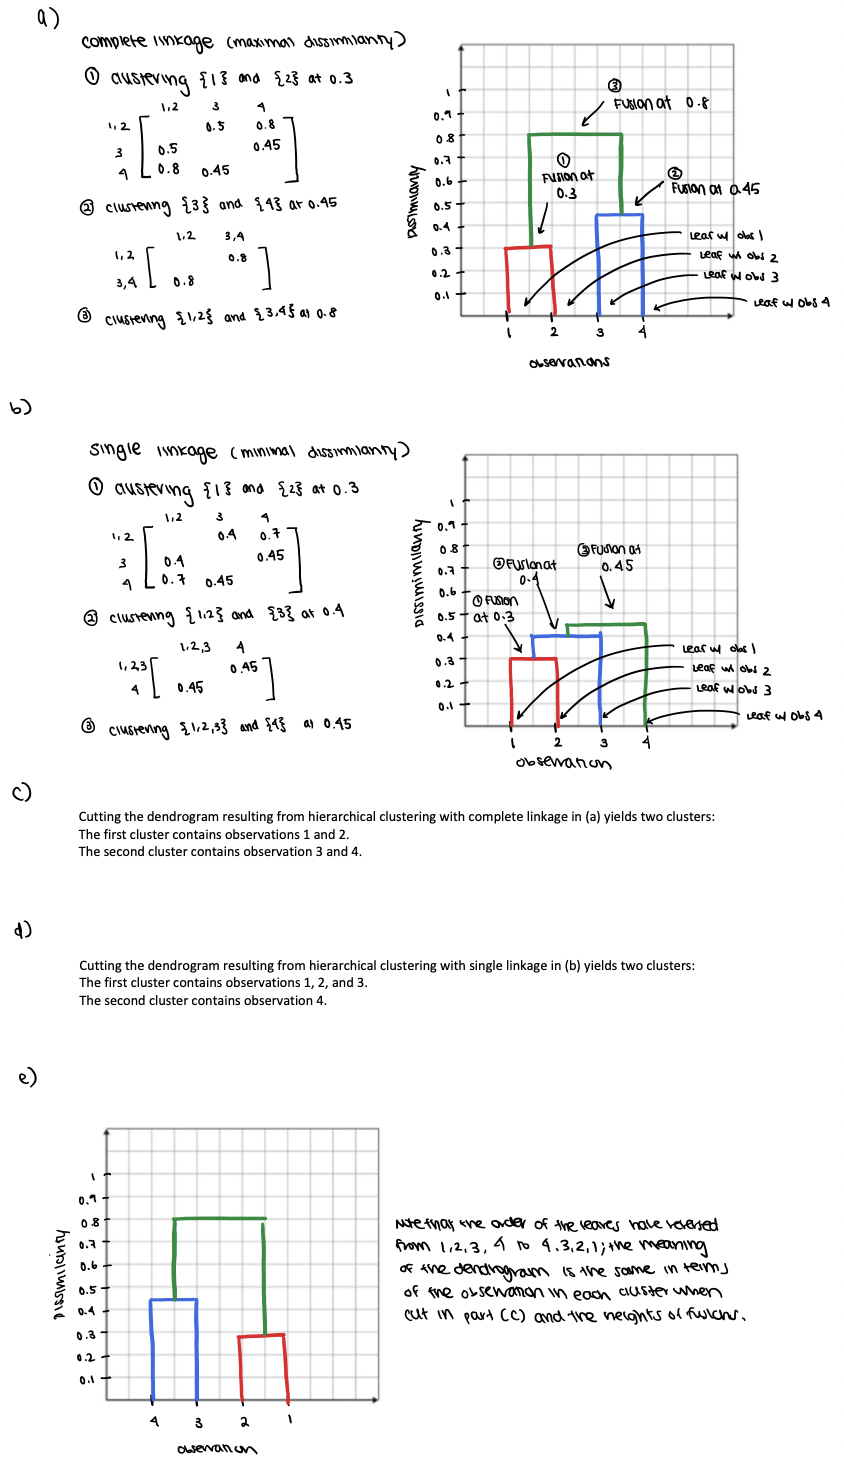

### Works Cited

1. Hamming Loss Scoring<br>
https://stackoverflow.com/questions/44081222/hamming-loss-not-support-in-cross-val-score<br>
2. Exact match and Hamming score metrics
https://medium.datadriveninvestor.com/a-survey-of-evaluation-metrics-for-multilabel-classification-bb16e8cd41cd
3. LinearSVC<br>
https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC<br>
4. Hamming distance, score, and loss<br>
https://torchmetrics.readthedocs.io/en/stable/classification/hamming_distance.html